# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dina Violina
- **Email:** dinnaviolins@gmail.com
- **ID Dicoding:** violinadina

## Menentukan Pertanyaan Bisnis

- Produk apa yang terjual paling laris?
- Produk apa yang terjual paling sedikit?
- Penjualan yang paling banyak kapan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
customers_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
order_items_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [7]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
orders_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
-
-

### Assessing Data

Tabel customers_df

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
print("Jumlah duplikasi data:", customers_df.duplicated().sum())

Jumlah duplikasi data: 0


In [15]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Tabel **geoloation**

In [16]:
geolocation_df.info()

geolocation_df.duplicated().sum()
print("Jumlah duplikasi data:", geolocation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi data: 261831


In [17]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [18]:
 geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Tabel **order_items_df**

In [19]:
order_items_df.info()
order_items_df.duplicated().sum()
print("Jumlah duplikasi data:", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi data: 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [20]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Tabel **order_payments_df**

In [21]:
order_payments_df.info()
order_payments_df.duplicated().sum()
print("Jumlah duplikasi data:", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi data: 0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Tabel **order_reviews_df**

In [23]:
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
order_reviews_df.duplicated().sum()
print("Jumlah duplikasi data:", order_reviews_df.duplicated().sum())


Jumlah duplikasi data: 0


In [25]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [26]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Tabel **orders_df**

In [27]:
orders_df.isna().sum()
print("Jumlah duplikasi data:", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi data: 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [29]:
orders_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


Tabel **product_category_df**

In [30]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [32]:
product_category_df.duplicated().sum()
print("Jumlah duplikasi data: ", product_category_df.duplicated().sum())

Jumlah duplikasi data:  0


In [33]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tabel **products_df**

In [34]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [36]:
products_df.duplicated().sum()
print("Jumlah duplikasi data: ", products_df.duplicated().sum())

Jumlah duplikasi data:  0


In [37]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Tabel **sellers_df**

In [38]:
 sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [39]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [40]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
sellers_df.value_counts()

,,,,count
seller_id,seller_zip_code_prefix,seller_city,seller_state,
0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP,1
a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,1
aadfe0417e61315688b6bd7043361e25,74340,goiania,GO,1
aae3bfea055532c57fb453ed3ec80b30,9271,santo andre,SP,1
aae5953b9edddf14749c0d65d60eb4b9,31035,belo horizonte,MG,1
...,...,...,...,...
54aa8463e87776b5612f4bdc4bd5d4de,30550,belo horizonte,MG,1
54c04bdb5ec46762f8f08c7e8f86ed4a,88037,florianopolis,SC,1
55029529919c0123526150bd26ca8f20,32280,contagem,MG,1


In [42]:
 sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Insight

Missing Values:
1. tabel order reviews : kolom review_comment_title dan review_comment_message
2. tabel orders_df : order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

3. tabel product :  
* product_description_lenght	610
* product_photos_qty	610
* product_weight_g	2
* product_length_cm	2
* product_height_cm	2
* product_width_cm	2


### Cleaning Data

#### Membersihkan tabel **order_reviews_df**

Missing values

In [43]:
print("Membersihkan missing values sesuai dengan kolom")
order_reviews_df[order_reviews_df.review_comment_title.isna()]

Membersihkan missing values sesuai dengan kolom


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [44]:
import random

In [45]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Title')

In [46]:
random_comments = ['Excellent!', 'Not bad', 'No issues', 'Good value']

order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].apply(
    lambda x: np.random.choice(random_comments) if pd.isna(x) else x
)

In [47]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


#### Membersihkan tabel **orders_df**

In [48]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [49]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [50]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(method='bfill')

<ipython-input-50-e1654fc602f8>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(method='bfill')


In [51]:
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(method='bfill')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(method='bfill')


<ipython-input-51-3dfa5103cafa>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(method='bfill')
<ipython-input-51-3dfa5103cafa>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(method='bfill')


#### Membersihkan tabel **product_df**

In [52]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [53]:
random_category = ['cool_stuff', 'alimentos_bebidas','informatica_acessorios']

products_df['product_category_name']=products_df['product_category_name'].apply(
    lambda x: np.random.choice(random_category) if pd.isna(x) else x
)

In [54]:
products_df['product_name_lenght']=products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean())

In [55]:
products_df['product_description_lenght']=products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean())

In [56]:
products_df['product_photos_qty']=products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean())

In [57]:
products_df['product_weight_g']=products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
products_df['product_length_cm']=products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_height_cm']=products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_width_cm']=products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())

**Insight:**
-
-

## Exploratory Data Analysis (EDA)


#### Explore customers_df

In [58]:
customers_df.groupby(by='customer_city').customer_id.count().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [59]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [60]:
customers_df.groupby(by='customer_state').customer_id.count().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [61]:
# order items terdiri order_id yang diorder customers
orderan_customers = pd.merge(
    left=orders_df,
    right=customers_df,
    on="customer_id",
    how="left"
)
orderan_customers.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [62]:
best_buy_customers = (
    orderan_customers.groupby(by="customer_id")
    .order_id.count()
    .sort_values(ascending=False)
    .reset_index()
)

best_buy_customers.rename(columns={"order_id": "total_orders"}, inplace=True)
best_buy_customers


,customer_id,total_orders
0,00012a2ce6f8dcda20d059ce98491703,1
1,aa62a16b10e3fb24ecdefd7e4dc3fa65,1
2,aa738cdb72af39e38482fa25b992c67c,1
3,aa7210736aad65a84e964cfa8d64aa66,1
4,aa72002446dfbac0691304465c1b982d,1
...,...,...
99436,5591abc9e7f9c644e7e7912aac65b718,1
99437,5590e685a78102fb3ac27ecf07412750,1
99438,558ea29f4c4dfd014345b6d3309549a2,1
99439,558de2f6863bf7588338479d614522a3,1


In [63]:
orderan_customers.groupby(by="customer_city").order_id.count().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


#### menggabungkan order item dengan product

In [64]:
penjualan = pd.merge(
    order_items_df,
    products_df,
    on="product_id",
    how="left"
)
penjualan.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [65]:
penjualan.groupby(by="product_category_name").product_id.count().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
informatica_acessorios,8550
moveis_decoracao,8334
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


In [66]:
print("5 Penjualan paling sedikit")
penjualan.groupby(by="product_category_name").product_id.count().sort_values(ascending=True).head(5)

5 Penjualan paling sedikit


,product_id
product_category_name,
seguros_e_servicos,2
fashion_roupa_infanto_juvenil,8
pc_gamer,9
la_cuisine,14
cds_dvds_musicais,14


#### Menggabungkan order dengan product

In [67]:
# Hasil penjualan per produuk
penjualan_produk_df = pd.merge(
    left=order_items_df,
    right=products_df,
    on="product_id",
    how="left"
)

penjualan_produk_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [79]:
# Menampilkan produk dengan penjualan tersedikit
produk_tersedikit = total_penjualan_df.sort_values(by="total_penjualan", ascending=True).head(5)
print("5 Produk dengan Penjualan Tersedikit")
print(produk_tersedikit)


5 Produk dengan Penjualan Tersedikit
            product_category_name  total_penjualan  total_pendapatan
67             seguros_e_servicos                2            283.29
37  fashion_roupa_infanto_juvenil                8            569.85
60                       pc_gamer                9           1545.95
46                     la_cuisine               14           2054.99
17              cds_dvds_musicais               14            730.00


In [80]:
# Menampilkan produk dengan penjualan terbanyak
produk_terbanyak = total_penjualan_df.sort_values(by="total_penjualan", ascending=False).head(5)
print("5 Produk dengan Penjualan Terbanyak:")
print(produk_terbanyak)


5 Produk dengan Penjualan Terbanyak:
     product_category_name  total_penjualan  total_pendapatan
13         cama_mesa_banho            11115        1036988.68
11            beleza_saude             9670        1258681.34
32           esporte_lazer             8641         988048.97
44  informatica_acessorios             8550         990061.38
54        moveis_decoracao             8334         729762.49


In [69]:
items_products = pd.merge(
    left=order_items_df,
    right=products_df,
    on="product_id",  # Menggunakan kolom `product_id` sebagai penghubung
    how="left"        # Menggunakan left join
)
items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


#### Order reviews

In [70]:
review = pd.merge(
    left=penjualan_produk_df,
    right=order_reviews_df,
    on="order_id",
    how="left"
)
review.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,No Title,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30000.0,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4.0,No Title,Not bad,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3050.0,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,No Title,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,200.0,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4.0,No Title,Excellent!,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,3750.0,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5.0,No Title,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [71]:
review.groupby(by="product_category_name").review_score.mean().sort_values(ascending=False)

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.446266
construcao_ferramentas_ferramentas,4.444444
flores,4.419355
...,...
moveis_escritorio,3.493183
pc_gamer,3.333333
portateis_cozinha_e_preparadores_de_alimentos,3.266667


In [72]:
total_penjualan_df = (
    penjualan_produk_df.groupby(by="product_category_name")
    .agg(
        # nama_produk=("product_category_name", "first"),
        total_penjualan=("order_id","count"),
        total_pendapatan =("price", "sum")
    )
    .reset_index()
)
total_penjualan_df

,product_category_name,total_penjualan,total_pendapatan
0,agro_industria_e_comercio,212,72530.47
1,alimentos,510,29393.41
2,alimentos_bebidas,762,75874.52
3,artes,209,24202.64
4,artes_e_artesanato,24,1814.01
...,...,...,...
68,sinalizacao_e_seguranca,199,21509.23
69,tablets_impressao_imagem,83,7528.41
70,telefonia,4545,323667.53
71,telefonia_fixa,264,59583.00


#### Payments

In [73]:
# pembayaran terbanyak melalui metode apa?
order_payments_df.groupby(by="payment_type").payment_value.sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


In [74]:
payment_frequencies_df= order_payments_df['payment_type'].value_counts().reset_index()
payment_frequencies_df.columns = ['payment_type', 'frequency']
print("Total Payments Rp :", order_payments_df['payment_value'].sum(), "dari", payment_frequencies_df['frequency'].sum(),"transaksi")
payment_frequencies_df

Total Payments Rp : 16008872.12 dari 103886 transaksi


,payment_type,frequency
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


#### Seller

In [75]:
seler_dan_produk = pd.merge

In [76]:
pembeli_terbanyak= pd.merge(
    left=order_items_df,
    right=sellers_df,
    on="seller_id",
    how="left"
)
pembeli_terbanyak.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [77]:
pembeli_terbanyak.groupby(by="seller_id").product_id.count().sort_values(ascending=False)

,product_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


In [78]:
# nama seler, product, banyak pembelian, count price

total_penjualan_seller_df= (
    pembeli_terbanyak.groupby(by="seller_city")
    .agg(
        # seller_city=("seller_city", "first"),
        banyak_penjualan=("product_id", "count"),
        total_penjualan=("price", "sum")
    )
    .reset_index()
)
total_penjualan_seller_df


,seller_city,banyak_penjualan,total_penjualan
0,04482255,1,399.90
1,abadia de goias,1,142.47
2,afonso claudio,6,293.99
3,aguas claras df,1,35.00
4,alambari,5,138.60
...,...,...,...
606,volta redonda,156,12954.79
607,votorantim,262,20056.34
608,votuporanga,138,21107.47
609,xanxere,8,2297.05


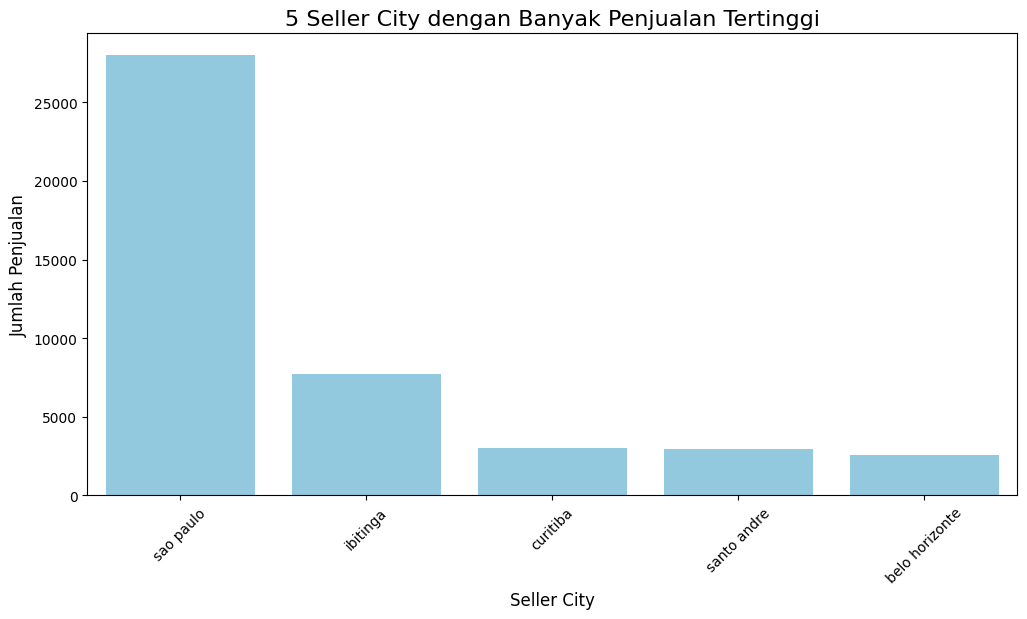

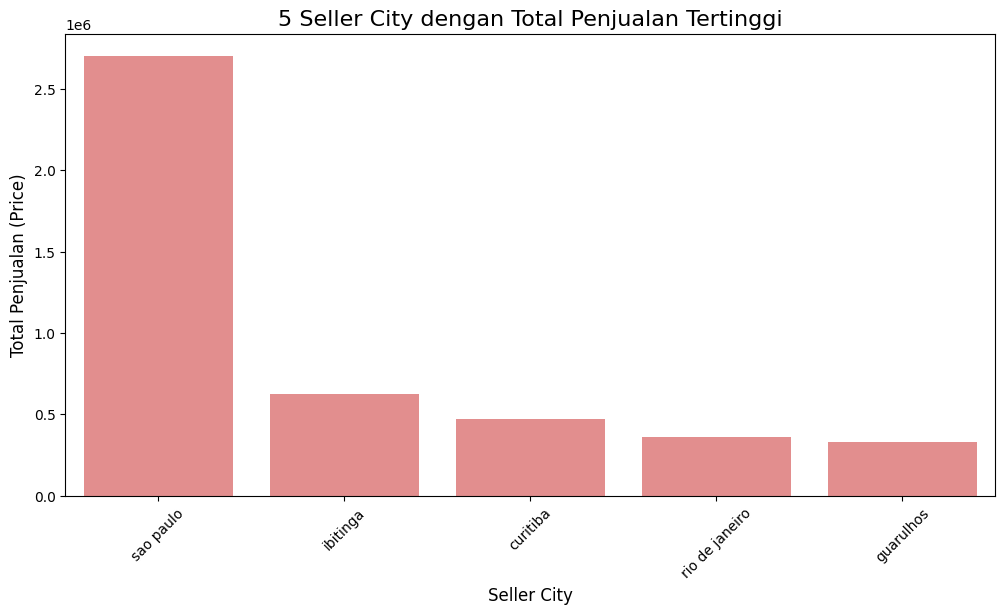

In [81]:
# Ambil 5 tertinggi berdasarkan banyak penjualan
top_5_banyak_penjualan = total_penjualan_seller_df.nlargest(5, 'banyak_penjualan')

# Visualisasi untuk banyak penjualan per seller_city
plt.figure(figsize=(12, 6))

# Menampilkan bar plot untuk 5 tertinggi banyak penjualan per seller_city
sns.barplot(x='seller_city', y='banyak_penjualan', data=top_5_banyak_penjualan, color='skyblue')

# Menambahkan title dan labels
plt.title('5 Seller City dengan Banyak Penjualan Tertinggi', fontsize=16)
plt.xlabel('Seller City', fontsize=12)
plt.ylabel('Jumlah Penjualan', fontsize=12)

# Putar label pada sumbu X jika diperlukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Ambil 5 tertinggi berdasarkan total penjualan (harga)
top_5_total_penjualan = total_penjualan_seller_df.nlargest(5, 'total_penjualan')

# Visualisasi untuk total penjualan per seller_city
plt.figure(figsize=(12, 6))

# Menampilkan bar plot untuk 5 tertinggi total penjualan per seller_city
sns.barplot(x='seller_city', y='total_penjualan', data=top_5_total_penjualan, color='lightcoral')

# Menambahkan title dan labels
plt.title('5 Seller City dengan Total Penjualan Tertinggi', fontsize=16)
plt.xlabel('Seller City', fontsize=12)
plt.ylabel('Total Penjualan (Price)', fontsize=12)

# Putar label pada sumbu X jika diperlukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [82]:
# nama seler, product, banyak pembelian, count price

total_penjualan_seller_df= (
    pembeli_terbanyak.groupby(by="seller_id")
    .agg(
        seller_city=("seller_city", "first"),
        banyak_penjualan=("product_id", "count"),
        total_penjualan=("price", "sum")
    )
    .reset_index()
)
total_penjualan_seller_df


,seller_id,seller_city,banyak_penjualan,total_penjualan
0,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,3,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,cariacica,239,25080.03
2,001e6ad469a905060d959994f1b41e4f,sao goncalo,1,250.00
3,002100f778ceb8431b7a1020ff7ab48f,franca,55,1234.50
4,003554e2dce176b5555353e4f3555ac8,goiania,1,120.00
...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,curitiba,1,69.90
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,curitiba,20,2101.20
3092,ffeee66ac5d5a62fe688b9d26f83f534,mirassol,14,1839.86
3093,fffd5413c0700ac820c7069d66d98c89,amparo,61,9062.30


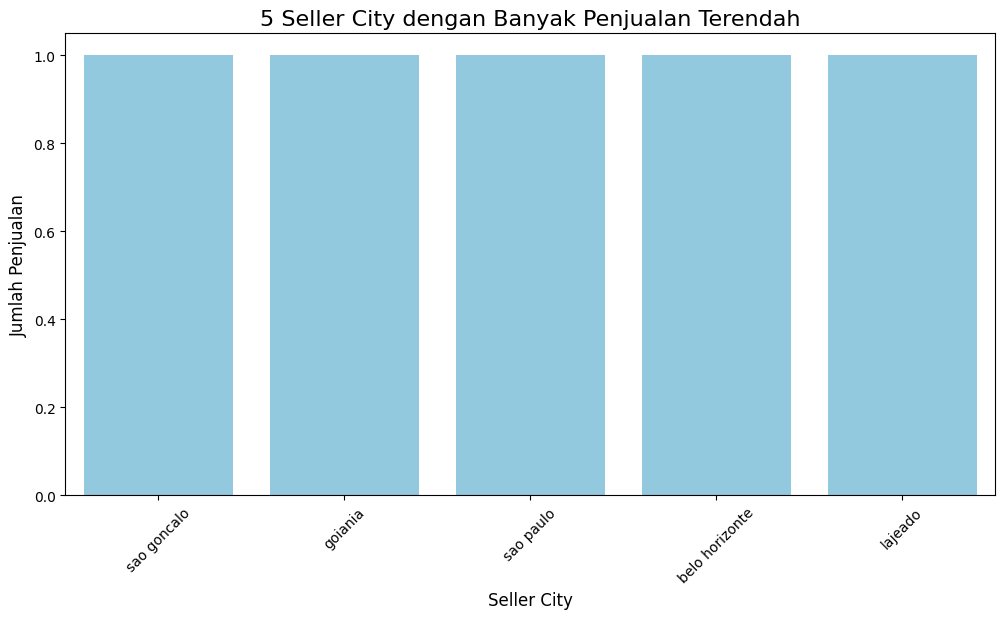

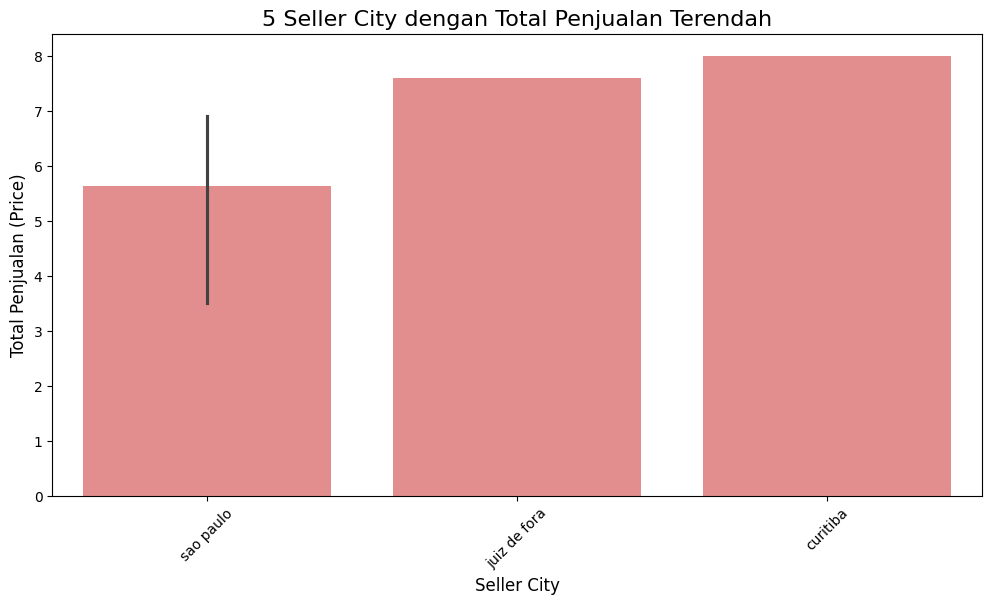

In [83]:
# Ambil 5 terendah berdasarkan banyak penjualan
bottom_5_banyak_penjualan = total_penjualan_seller_df.nsmallest(5, 'banyak_penjualan')

# Visualisasi untuk banyak penjualan per seller_city
plt.figure(figsize=(12, 6))

# Menampilkan bar plot untuk 5 terendah banyak penjualan per seller_city
sns.barplot(x='seller_city', y='banyak_penjualan', data=bottom_5_banyak_penjualan, color='skyblue')

# Menambahkan title dan labels
plt.title('5 Seller City dengan Banyak Penjualan Terendah', fontsize=16)
plt.xlabel('Seller City', fontsize=12)
plt.ylabel('Jumlah Penjualan', fontsize=12)

# Putar label pada sumbu X jika diperlukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Ambil 5 terendah berdasarkan total penjualan (harga)
bottom_5_total_penjualan = total_penjualan_seller_df.nsmallest(5, 'total_penjualan')

# Visualisasi untuk total penjualan per seller_city
plt.figure(figsize=(12, 6))

# Menampilkan bar plot untuk 5 terendah total penjualan per seller_city
sns.barplot(x='seller_city', y='total_penjualan', data=bottom_5_total_penjualan, color='lightcoral')

# Menambahkan title dan labels
plt.title('5 Seller City dengan Total Penjualan Terendah', fontsize=16)
plt.xlabel('Seller City', fontsize=12)
plt.ylabel('Total Penjualan (Price)', fontsize=12)

# Putar label pada sumbu X jika diperlukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [84]:
total_penjualan_seller_df.sort_values(by="banyak_penjualan", ascending=False).head(5)
# print("Penjualan paling sedikit")

,seller_id,seller_city,banyak_penjualan,total_penjualan
1235,6560211a19b47992c3666cc44a7e94c0,sao paulo,2033,123304.83
881,4a3ca9315b744ce9f8e9374361493884,ibitinga,1987,200472.92
368,1f50f920176fa81dab994f9023523100,sao jose do rio preto,1931,106939.21
2481,cc419e0650a3c5ba77189a1882b7556a,santo andre,1775,104288.42
2643,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,1551,160236.57


In [85]:
total_penjualan_seller_df.sort_values(by="banyak_penjualan", ascending=True).head(1000)


,seller_id,seller_city,banyak_penjualan,total_penjualan
1547,7d81e74a4755b552267cd5e081563028,sao paulo,1,32.50
2214,b86a47b3366e3b5424a7b225781f4908,passos,1,86.50
407,2235cf78d3e2073a88146a9cb60f0dd0,sao paulo,1,178.99
2228,b9de031b671cd48b28fae9d828cbf2b4,sao paulo,1,155.32
762,3fefda3299e6dfaea3466ef346a3571a,curitiba,1,209.00
...,...,...,...,...
212,1284de4ae8aa26997e748c851557cf0e,laranjeiras do sul,3,1459.97
807,432c67955c0acd1fd6b0b5d678766a71,sao paulo,3,1151.00
182,0f7eea709efdf942b5f95c7516dbacd7,pedrinhas paulista,3,195.74
400,217f005bb37ff3aeef5b2ae1788e75ba,osasco,3,74.97


In [86]:
filtered_df = total_penjualan_seller_df[total_penjualan_seller_df["banyak_penjualan"] == 1]
counts = len(filtered_df)

if counts > 0:
    sorted_df = filtered_df.sort_values(by="banyak_penjualan")
    print(f"Jumlah seller dengan banyak penjualan 1: {counts}")
    print(sorted_df)  # Or display the sorted DataFrame as needed
else:
    print("Tidak ada seller dengan banyak penjualan 1.")

Jumlah seller dengan banyak penjualan 1: 509
                             seller_id     seller_city  banyak_penjualan  \
2     001e6ad469a905060d959994f1b41e4f     sao goncalo                 1   
2239  bab0a8cd684e41ba6e2637dca0979d3b  rio de janeiro                 1   
2236  ba8e85df286308fe68a2ce83a8f8b2d6  santa catarina                 1   
2228  b9de031b671cd48b28fae9d828cbf2b4       sao paulo                 1   
2214  b86a47b3366e3b5424a7b225781f4908          passos                 1   
...                                ...             ...               ...   
1026  5415337f1863452476d42d9f14a16a61  belo horizonte                 1   
1018  535bf14f36346c7f59d87cece104d70c  rio de janeiro                 1   
1014  53336f97ddbe53e2a617d07b17447b95       sao paulo                 1   
1105  5a9b3bcab695173c820e53934574ae80           salto                 1   
3090  ffcfefa19b08742c5d315f2791395ee5        curitiba                 1   

      total_penjualan  
2              250

Berdasarkan Negara

In [87]:
bystate_seller_df = sellers_df.groupby(by="seller_state").seller_id.nunique().reset_index()
bystate_seller_df.rename(columns={
    "seller_id":"seller_count"
}, inplace=True)
bystate_seller_df

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


In [88]:
bycity_seller_df = sellers_df.groupby(by="seller_city").seller_id.nunique().reset_index()
bycity_seller_df.rename(columns={
    "seller_id":"seller_count"
}, inplace=True)
bycity_seller_df

,seller_city,seller_count
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
606,volta redonda,2
607,votorantim,4
608,votuporanga,4
609,xanxere,2


### Explore ALL data

In [89]:
review.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,No Title,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30000.0,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4.0,No Title,Not bad,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3050.0,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,No Title,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,200.0,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4.0,No Title,Excellent!,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,3750.0,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5.0,No Title,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [90]:
pembeli_terbanyak

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP


In [91]:
all_data = pd.merge(
  left=orderan_customers,
  right = review,
  on = "order_id",
  how = "left"

)


In [92]:
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,Good value,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5.0,No Title,No issues,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,4950.0,40.0,10.0,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,No Title,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
114085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,13300.0,32.0,90.0,22.0,371579771219f6db2d830d50805977bb,5.0,No Title,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
114086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,No Title,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
114087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,No Title,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [ ]:
all_data=pd.merge(
    left=all_data,
    right=order_payments_df,
    on=["order_id"],  # Pastikan kunci sesuai
    how="left"
)
all_data

In [93]:
all_data=pd.merge(
    left=all_data,
    right=total_penjualan_seller_df,
    on=["seller_id"],  # Pastikan kunci sesuai
    how="left"
)
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_city,banyak_penjualan,total_penjualan
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,maua,53.0,2349.94
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,belo horizonte,126.0,13544.95
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,Good value,2018-08-18 00:00:00,2018-08-22 19:07:58,guariba,1156.0,229472.63
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,belo horizonte,156.0,14362.30
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,15.0,e50934924e227544ba8246aeb3770dd4,5.0,No Title,No issues,2018-02-17 00:00:00,2018-02-18 13:02:51,mogi das cruzes,174.0,6109.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,No Title,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,tupa,79.0,13602.73
114085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,22.0,371579771219f6db2d830d50805977bb,5.0,No Title,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,sao paulo,70.0,13012.42
114086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,No Title,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,ilicinea,770.0,101901.16
114087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,No Title,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,ilicinea,770.0,101901.16


Menyimpan data baru

In [94]:
all_data.to_csv('/content/drive/MyDrive/3. Belajar OTW kerja/data analys/DICODING/E-Commerce Public Dataset/all_data.csv', index=False)

**Insight:**
-
-

In [95]:
all_data = all_data.drop_duplicates()


In [96]:
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_city,banyak_penjualan,total_penjualan
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,maua,53.0,2349.94
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,belo horizonte,126.0,13544.95
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,Good value,2018-08-18 00:00:00,2018-08-22 19:07:58,guariba,1156.0,229472.63
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,belo horizonte,156.0,14362.30
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,15.0,e50934924e227544ba8246aeb3770dd4,5.0,No Title,No issues,2018-02-17 00:00:00,2018-02-18 13:02:51,mogi das cruzes,174.0,6109.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,No Title,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,tupa,79.0,13602.73
114085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,22.0,371579771219f6db2d830d50805977bb,5.0,No Title,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,sao paulo,70.0,13012.42
114086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,No Title,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,ilicinea,770.0,101901.16
114087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,No Title,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,ilicinea,770.0,101901.16


In [97]:

all_data.dropna(inplace=True)


In [98]:
all_data.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [99]:
print(all_data.columns)  # Cek kolom pada all_data
# print(total_penjualan_seller_df.columns)  # Cek kolom pada total_penjualan_seller_df


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_city', 'banyak_penjualan',
       'total_penjualan'],
      dtype='object')


In [100]:
# Pilih salah satu seller_id (contoh: seller_id_x)
all_data.rename(columns={"seller_id_x": "seller_id"}, inplace=True)


## Visualization & Explanatory Analysis

In [101]:
all_data.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_city,banyak_penjualan,total_penjualan
26560,a35d19174da638cd2d36dfd54c07749f,080251bf5e42a68d0afe41550463d74a,delivered,2017-09-26 15:58:52,2017-09-26 16:14:16,2017-09-27 16:38:12,2017-10-03 15:11:29,2017-10-25 00:00:00,c5a9f152f2709d4180302cfcb357c237,2674,...,35.0,7400d03d4442d7b7639f863d31e0c4d2,5.0,No Title,Good value,2017-10-04 00:00:00,2017-10-06 23:57:43,canoas,104.0,12775.84
17025,1c366a6fab2801f8b19036b3fc66ef17,71021b16c54b62203d60e527aafc7095,delivered,2017-10-02 22:11:10,2017-10-02 22:28:16,2017-10-03 15:08:02,2017-10-10 11:54:13,2017-10-25 00:00:00,d278b814a0d0333c7fa5d64c9cdaac53,80730,...,30.0,ebe00bf7906c476e7dae9fdd17583c4c,4.0,No Title,Produto bom. Dentro das expectativas. Acertei ...,2017-10-11 00:00:00,2017-10-14 17:59:00,poa,165.0,8526.04
86921,891b59dfbc8a1d7b30f7fe7fe81b7d7d,14018ff56b0d7cbc692397cc71d114c2,delivered,2017-12-29 00:11:14,2017-12-29 00:31:52,2018-01-08 23:50:00,2018-01-15 21:24:58,2018-02-01 00:00:00,1e55e11e763ab33050725d0e90174464,22775,...,16.0,2988c048ac32fe63c278544e24b0b714,5.0,No Title,Excellent!,2018-01-16 00:00:00,2018-01-26 17:09:35,santo andre,1775.0,104288.42
111152,1f0e3e7a13d98443333a705e4ea42148,31a8654d467ab5c0d7a4a273272c460f,delivered,2018-08-15 07:19:56,2018-08-16 04:35:11,2018-08-20 12:28:00,2018-09-13 19:24:35,2018-08-28 00:00:00,86fae602a67c384fa4d64cd55fc51c52,13315,...,15.0,bc8737fe88d7e77e5e7746c5ad074378,3.0,No Title,Good value,2018-08-31 00:00:00,2018-08-31 09:54:51,guariba,1156.0,229472.63
4114,0571cdb407bf04b419c94ffd7acbd874,2ec7666d1077597d4e4ff2116a319530,delivered,2017-01-19 21:24:05,2017-01-21 03:05:52,2017-01-23 11:41:56,2017-01-30 13:24:45,2017-03-03 00:00:00,f171039a67a78b3d57475168802da70a,72720,...,11.0,8b5afd726cc86efde6b416387b9d3ef4,1.0,No Title,o película que recebi apesar de vir identifica...,2017-01-31 00:00:00,2017-02-03 08:52:23,sao paulo,169.0,2574.78


<ipython-input-103-32e8479ec773>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_id', y='banyak_penjualan', data=top_sellers, palette='Blues_d')


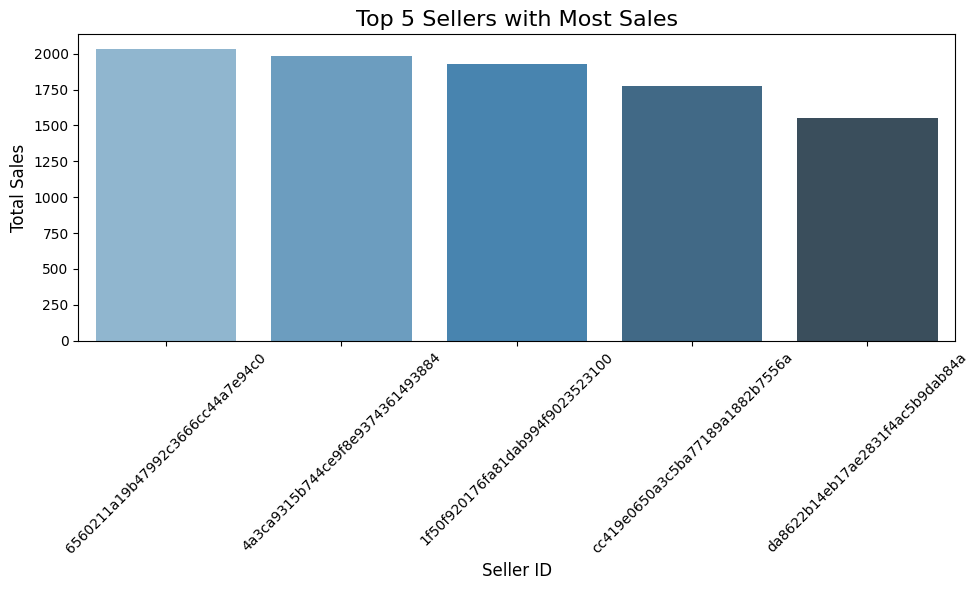

In [103]:
top_sellers = total_penjualan_seller_df.sort_values(by="banyak_penjualan", ascending=False).head(5)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='seller_id', y='banyak_penjualan', data=top_sellers, palette='Blues_d')

# Menambahkan judul dan label
plt.title('Top 5 Sellers with Most Sales', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 1: Produk apa yang terjual paling laris?



In [104]:
# Menampilkan produk dengan penjualan tersedikit
produk_tersedikit = all_data.sort_values(by="total_penjualan", ascending=True).head(5)
print("5 Produk dengan Penjualan Tersedikit")
print(produk_tersedikit)


5 Produk dengan Penjualan Tersedikit
                               order_id                       customer_id  \
17449  c79bdf061e22288609201ec60deb42fb  fe4176df564772c058286208c0daa2a8   
24585  a76ada6fa5bcfc4b6225ec88c219ab99  23227f94be082fdbf86795983cd4ff4f   
54518  cf5c8d9f52807cb2d2f0a0ff54c478da  e898b5ef24833b9cb9e2d4f00b937595   
54116  00482f2670787292280e0a8153d82467  baa4ed05f22ffb6c4a41b71b699a492c   
96751  97abc984480b7b063adb9e32e8bdbcde  20900bb42895ecd757d8ca51ac95140d   

      order_status order_purchase_timestamp    order_approved_at  \
17449   processing      2017-05-01 18:58:54  2017-05-01 19:05:20   
24585    delivered      2017-03-15 20:14:39  2017-03-15 20:14:39   
54518    delivered      2018-08-24 13:04:05  2018-08-24 13:24:27   
54116    delivered      2017-02-13 16:18:07  2017-02-14 03:42:56   
96751   processing      2017-05-05 03:00:07  2017-05-05 03:10:13   

      order_delivered_carrier_date order_delivered_customer_date  \
17449          2018-01-

### Pertanyaan 2: Produk apa yang terjual paling banyak?

In [105]:
produk_terbanyak = all_data.sort_values(by="total_penjualan", ascending=False).head(5)
print("5 Produk dengan Penjualan Terbanyak")
print(produk_terbanyak)

5 Produk dengan Penjualan Terbanyak
                               order_id                       customer_id  \
15473  182fb1824c0cd548ce120c6108630e37  53e36864f1b9213f02300d3ca6c72523   
55396  62f71f81ef15beda4132f1d92528a59f  4a55706ea2dce8ee69c55f384a14761b   
35365  e31ec91cea1ecf97797787471f98a8c2  56b18e2166679b8a959d72dd06da27f9   
46150  da9c1fea6f01b428bb64d42d81269182  c57634d5990d5d8952865f55f994cc4d   
72052  a198db4525943b0e205a7a453716bbda  a92daa58ac5dd4507c9d8846805f68a8   

      order_status order_purchase_timestamp    order_approved_at  \
15473    delivered      2018-02-01 15:20:40  2018-02-01 15:35:15   
55396    delivered      2017-11-15 16:16:09  2017-11-15 16:26:26   
35365    delivered      2017-11-03 21:08:33  2017-11-03 21:31:20   
46150    delivered      2018-01-18 10:01:14  2018-01-18 10:17:08   
72052    delivered      2018-04-04 13:40:45  2018-04-04 13:55:11   

      order_delivered_carrier_date order_delivered_customer_date  \
15473          2018-02-0

## Pertanyaan 3 :Penjualan yang paling banyak kapan?

In [108]:
# penjualan paling banyak
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
penjualan_per_hari = (
    all_data.groupby(all_data['order_purchase_timestamp'].dt.date)
    .price.sum()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'tanggal', 'price': 'total_pendapatan'})
)
best_penjualan = penjualan_per_hari.loc[penjualan_per_hari['total_pendapatan'].idxmax()]
print("Tanggal dengan penjualan tertinggi", best_penjualan)


Tanggal dengan penjualan tertinggi tanggal             2017-11-24
total_pendapatan     153192.33
Name: 336, dtype: object


In [109]:
# penjualan paling banyak per tahun
penjualan_per_tahun = (
    all_data.groupby(all_data['order_purchase_timestamp'].dt.year)
    .price.sum()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'tahun', 'price': 'total_pendapatan'})
)
hasil_per_tahun= penjualan_per_tahun.loc[penjualan_per_tahun['total_pendapatan'].idxmax()]
print("Tahun dengan penjualan tertinggi", hasil_per_tahun)

Tahun dengan penjualan tertinggi tahun                  2018.00
total_pendapatan    7349418.27
Name: 2, dtype: float64


## Analisis Lanjutan

RFM


Recency:

Kapan terakhir kali pelanggan melakukan pembelian?

In [110]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

all_data_sorted = all_data.sort_values(by='order_purchase_timestamp', ascending=False)
transaksi_terakhir = all_data_sorted.iloc[0]

# print("Transaksi terakhir :", transaksi_terakhir)
print(transaksi_terakhir[['order_id', 'customer_id', 'order_purchase_timestamp']])

order_id                    54282e97f61c23b78330c15b154c867d
customer_id                 4b7decb9b58e2569548b8b4c8e20e8d7
order_purchase_timestamp                 2018-09-03 09:06:57
Name: 71386, dtype: object


In [111]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
all_data_first = all_data.sort_values(by='order_purchase_timestamp', ascending=True)
transaksi_pertama = all_data_first.iloc[0]

print(transaksi_pertama[['order_id', 'customer_id', 'order_purchase_timestamp']])

order_id                    2e7a8482f6fb09756ca50c10d7bfc047
customer_id                 08c5351a6aca1c1589a38f244edeee9d
order_purchase_timestamp                 2016-09-04 21:15:19
Name: 5143, dtype: object


Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.

In [112]:
start_date = '2018-01-01'
end_date = '2018-09-03'

filter_data = all_data[
    (all_data['order_purchase_timestamp']>= start_date) &
    (all_data['order_purchase_timestamp'] <= end_date)
]

jumlah_transaksi_per_pelanggan = (
    filter_data.groupby(by="customer_id")
    .order_id.nunique()
    .reset_index()
    .rename(columns={"order_id": "frequency"})
)


print(jumlah_transaksi_per_pelanggan.sort_values(by="frequency", ascending=False))

                            customer_id  frequency
0      000379cdec625522490c315e70c7a9fb          1
35672  aac6ff0b4a7bdfaecc06c38c4d37312e          1
35596  aa680976703cc404563da71518e6b940          1
35597  aa680a3db54307a03f5ec70888d99ec1          1
35598  aa69109c4c174abc3b890804f78d78fc          1
...                                 ...        ...
17804  557f70dad14918337f244683541f5f4a          1
17805  5581302de852c09823ec2e0fd3c46d82          1
17806  55814b1c0dcf038f760c8f30b1b1d430          1
17807  55836520f2093cbfbbcc28fa0de53223          1
53403  ffff42319e9b2d713724ae527742af25          1

[53404 rows x 2 columns]


Visualisasi

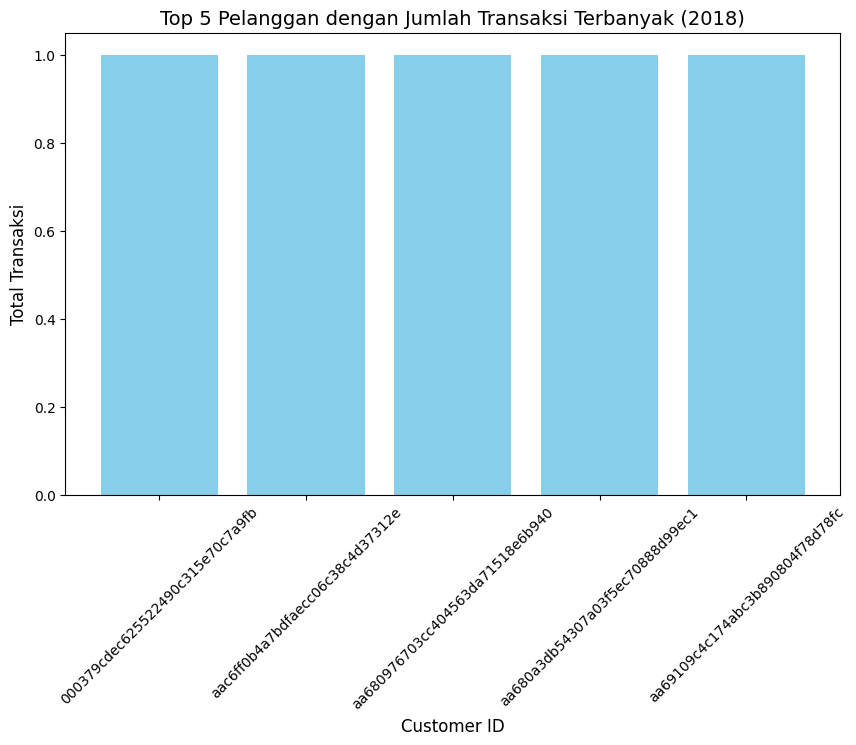

In [113]:
top_customers = jumlah_transaksi_per_pelanggan.sort_values(by="frequency", ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_customers['customer_id'], top_customers['frequency'], color='skyblue')
plt.title('Top 5 Pelanggan dengan Jumlah Transaksi Terbanyak (2018)', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Transaksi', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [114]:
start_date = '2018-01-01'
end_date = '2018-01-31'
filtered_data = all_data[
    (all_data['order_purchase_timestamp'] >= start_date) &
    (all_data['order_purchase_timestamp'] <= end_date)
]

# Grupkan data berdasarkan customer_id dan hitung total pengeluaran
total_pengeluaran_per_pelanggan = (
    filtered_data.groupby('customer_id')
        .price.sum()
    .reset_index()
    .rename(columns={'price': 'total_pengeluaran'})
)

# Tampilkan hasil
print(total_pengeluaran_per_pelanggan.sort_values(by='total_pengeluaran', ascending=False))


                           customer_id  total_pengeluaran
4619  addc91fdf9c2b3045497b57fc710e820            3690.00
3004  73236a0796f53d60d4530e30df0cef8d            2110.00
727   1ad8bdb3f2f3403ef79ad8d80dc8d425            2029.00
6091  e215081c5233958b3ac345346676f7ab            1997.00
4764  b2a89e46355af5dfd2f26b450d97a014            1997.00
...                                ...                ...
4094  9b827375ba57d2e979329d7a5c92685d               5.99
3818  90c26720bdb08da134b88bed2c3ac52a               5.99
5020  bbeac8b201688b9c1ae8b64ff59f8b76               5.31
1054  2719de14d13a9835b0ec43698abda75a               5.20
1464  35e459cd733a3cb6d98f593fcc9d67db               4.99

[6899 rows x 2 columns]


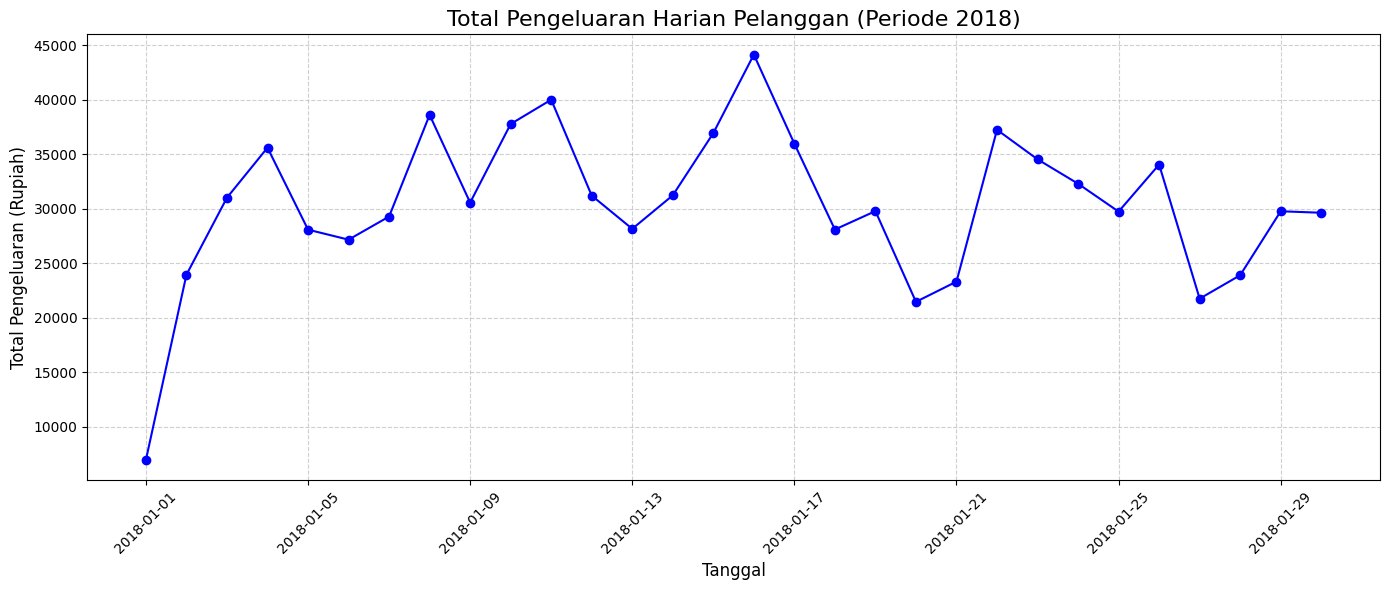

In [115]:

pengeluaran_per_hari = (
    filtered_data.groupby(filtered_data['order_purchase_timestamp'].dt.date)
    .price.sum()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'tanggal', 'price': 'total_pengeluaran'})
)

# Plot grafik *line chart*
plt.figure(figsize=(14, 6))
plt.plot(
    pengeluaran_per_hari['tanggal'],
    pengeluaran_per_hari['total_pengeluaran'],
    marker='o',
    linestyle='-',
    color='blue'
)
plt.title('Total Pengeluaran Harian Pelanggan (Periode 2018)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Pengeluaran (Rupiah)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [116]:
penjualan_per_hari =(
    all_data.groupby(all_data['order_purchase_timestamp'].dt.date)
    .price.sum()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'tanggal', 'price': 'total_pendapatan'})
)
best_penjualan = penjualan_per_hari.loc[penjualan_per_hari['total_pendapatan'].idxmax()]
print("Tanggal dengan penjualan tertinggi", best_penjualan)

Tanggal dengan penjualan tertinggi tanggal             2017-11-24
total_pendapatan     153192.33
Name: 336, dtype: object


In [117]:
penjualan_per_tahun=(
    all_data.groupby(all_data['order_purchase_timestamp'].dt.year)
    .price.sum()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'tahun', 'price': 'total_pendapatan'})
)
hasil_per_tahun = penjualan_per_tahun.loc[penjualan_per_tahun['total_pendapatan'].idxmax()]
print("Tahun dengan penjualan tertinggi", hasil_per_tahun)

Tahun dengan penjualan tertinggi tahun                  2018.00
total_pendapatan    7349418.27
Name: 2, dtype: float64


## Conclusion

- Penjualan terbanyak adalah produk cama_mesa_banho
- Produk yang sedikit terjual seguros_e_servicos
- Penjualan paling banyak pada tanggal 24 - 11 - 2017